<a href="https://colab.research.google.com/github/AshtonGlover/stock-prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [262]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-23,323.820007,329.200012,323.459991,327.000000,324.563812,21166400
1,2023-08-24,332.850006,332.980011,319.959991,319.970001,317.586182,23281400
2,2023-08-25,321.470001,325.359985,318.799988,322.980011,320.573761,21684100
3,2023-08-28,325.660004,326.149994,321.720001,323.700012,321.288391,14808500
4,2023-08-29,321.880005,328.980011,321.880005,328.410004,325.963318,19284600
...,...,...,...,...,...,...,...
247,2024-08-16,420.600006,421.339996,417.299988,418.470001,418.470001,22775600
248,2024-08-19,418.959991,421.750000,416.459991,421.529999,421.529999,15234000
249,2024-08-20,421.700012,425.859985,421.640015,424.799988,424.799988,16387600
250,2024-08-21,424.079987,426.399994,421.720001,424.140015,424.140015,16067300


In [263]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2023-08-23,327.000000
1,2023-08-24,319.970001
2,2023-08-25,322.980011
3,2023-08-28,323.700012
4,2023-08-29,328.410004
...,...,...
247,2024-08-16,418.470001
248,2024-08-19,421.529999
249,2024-08-20,424.799988
250,2024-08-21,424.140015


In [264]:
import datetime

def strToDate(s):
  split_date = s.split('-')
  day, month, year = int(split_date[2]), int(split_date[1]), int(split_date[0])
  return datetime.datetime(year = year, month = month, day = day)

In [265]:
df['Date'] = df['Date'].apply(strToDate)
df['Date']

,Date
0,2023-08-23
1,2023-08-24
2,2023-08-25
3,2023-08-28
4,2023-08-29
...,...
247,2024-08-16
248,2024-08-19
249,2024-08-20
250,2024-08-21


In [266]:
df.index = df.pop('Date')
df

,Close
Date,
2023-08-23,327.000000
2023-08-24,319.970001
2023-08-25,322.980011
2023-08-28,323.700012
2023-08-29,328.410004
...,...
2024-08-16,418.470001
2024-08-19,421.529999
2024-08-20,424.799988


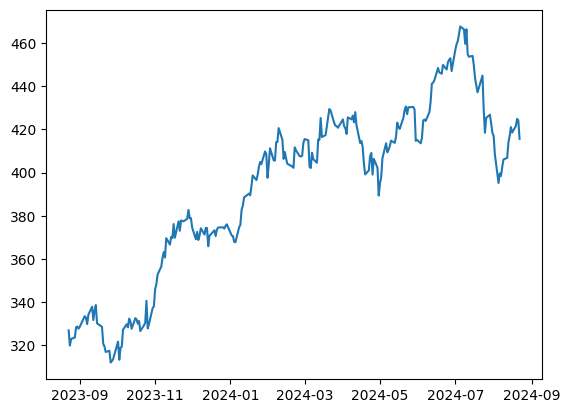

In [267]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [325]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = strToDate(first_date_str)
  last_date  = strToDate(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(len(df_subset))
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2023-10-05',
                                '2024-08-22',
                                n=30)
windowed_df

,Target Date,Target-30,Target-29,Target-28,Target-27,Target-26,Target-25,Target-24,Target-23,Target-22,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2023-10-05,327.000000,319.970001,322.980011,323.700012,328.410004,328.790009,327.760010,328.660004,333.549988,...,317.010010,317.540009,312.140015,312.790009,313.640015,315.750000,321.799988,313.390015,318.959991,319.359985
1,2023-10-06,319.970001,322.980011,323.700012,328.410004,328.790009,327.760010,328.660004,333.549988,332.880005,...,317.540009,312.140015,312.790009,313.640015,315.750000,321.799988,313.390015,318.959991,319.359985,327.260010
2,2023-10-09,322.980011,323.700012,328.410004,328.790009,327.760010,328.660004,333.549988,332.880005,329.910004,...,312.140015,312.790009,313.640015,315.750000,321.799988,313.390015,318.959991,319.359985,327.260010,329.820007
3,2023-10-10,323.700012,328.410004,328.790009,327.760010,328.660004,333.549988,332.880005,329.910004,334.269989,...,312.790009,313.640015,315.750000,321.799988,313.390015,318.959991,319.359985,327.260010,329.820007,328.390015
4,2023-10-11,328.410004,328.790009,327.760010,328.660004,333.549988,332.880005,329.910004,334.269989,337.940002,...,313.640015,315.750000,321.799988,313.390015,318.959991,319.359985,327.260010,329.820007,328.390015,332.420013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2024-08-16,467.559998,466.239990,459.540009,466.250000,454.700012,453.549988,453.959991,449.519989,443.519989,...,395.149994,399.609985,398.429993,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001
218,2024-08-19,466.239990,459.540009,466.250000,454.700012,453.549988,453.959991,449.519989,443.519989,440.369995,...,399.609985,398.429993,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001,421.529999
219,2024-08-20,459.540009,466.250000,454.700012,453.549988,453.959991,449.519989,443.519989,440.369995,437.109985,...,398.429993,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001,421.529999,424.799988
220,2024-08-21,466.250000,454.700012,453.549988,453.959991,449.519989,443.519989,440.369995,437.109985,442.940002,...,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001,421.529999,424.799988,424.140015


In [326]:
def windowed_df_to_date_X_y(windowed_dataframe):
  dfasnp = windowed_dataframe.to_numpy()

  dates = dfasnp[:, 0]

  middle_matrix = dfasnp[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = dfasnp[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((222,), (222, 30, 1), (222,))

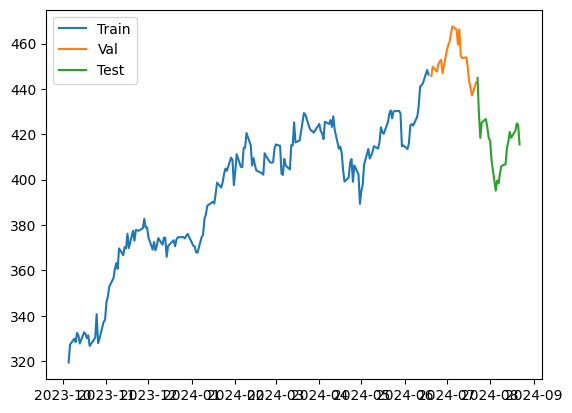

In [327]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, x_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, x_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, x_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

In [382]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential([
                    layers.Input(shape=(30, 1)),

                    layers.LSTM(units=256),

                    layers.Dense(units=256, activation='relu'),
                    layers.Dense(units=128, activation='relu'),
                    layers.Dense(units=64, activation='relu'),
                    layers.Dense(units=32, activation='relu'),
                    layers.Dense(units=1)
                ])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 100)



Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - loss: 156803.0781 - mean_absolute_error: 394.7748 - val_loss: 203685.1406 - val_mean_absolute_error: 451.2409
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 154371.5312 - mean_absolute_error: 391.7244 - val_loss: 200978.1094 - val_mean_absolute_error: 448.2313
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - loss: 151456.6719 - mean_absolute_error: 388.0310 - val_loss: 194776.5469 - val_mean_absolute_error: 441.2593
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 145974.9219 - mean_absolute_error: 380.8326 - val_loss: 180487.1250 - val_mean_absolute_error: 424.7591
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 129948.3984 - mean_absolute_error: 359.0893 - val_loss: 147896.1094 - val_mean_absolute_error: 384.4848
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 95853.4219 - mean_absolute_error: 307.4823 - val_loss: 87939.1250 - val_mean_absolute_error: 296.4305
Epoch 7/100
6/6 ━━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


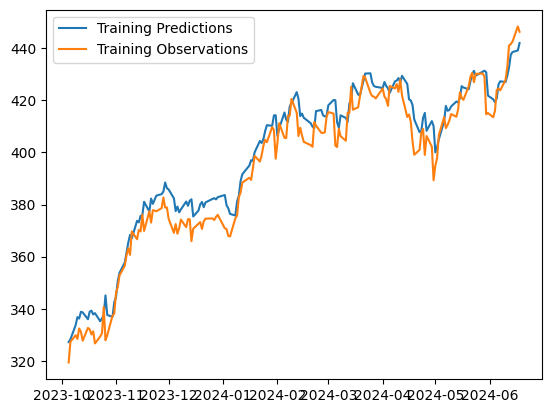

In [383]:
train_predict = model.predict(x_train).flatten()

plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


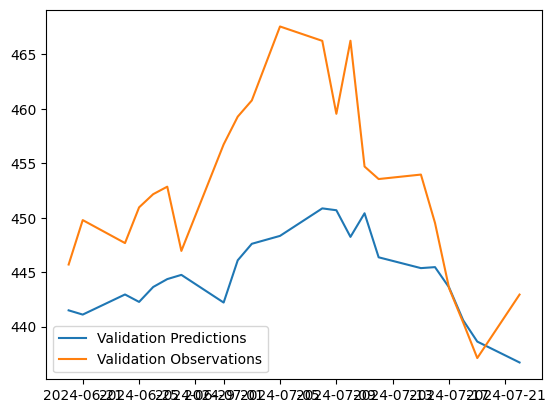

In [385]:
val_predict = model.predict(x_val).flatten()

plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


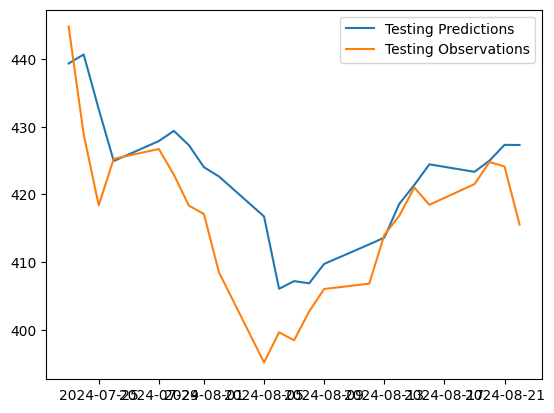

In [386]:
test_predict = model.predict(x_test).flatten()

plt.plot(dates_test, test_predict)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
!pip install tensorflow
